# Ternary Search Tree Project

## Anahita Hosseinkhani (2262542), Oviya Arockia raj (2262353), Elisa Verhofstadt (2261793)

A ternary search tree has nodes with the following attributes:
* a character, can be `None`;
* a Boolean flag that indicates whether the character represented
  by this node has been the last in a string that was inserted in the
  tree;
* the "less-than" child;
* the "equals" child and
* the "larger-than" child.

The data structure should support the following operations:
* string insert
* string search
* prefix string search
* return the number of strings stored in the data structure
* return all strings stored in the data structure

Also ensure that an instance of the data structure can be visualy represented, e.g., in aSCII format.

# Implementation

In [1]:
%load_ext autoreload
%autoreload 2

The data structure has been implemented as a class.

In [2]:

import random
import networkx as nx
import matplotlib.pyplot as plt
import json


class TernarySearchTree:
    root_node = None

    class TSTNode:
        def __init__(self, value):
            self.value = value
            self.right_node = None
            self.left_node = None
            self.middle_node = None
            self.is_terminal = False

    def __init__(self):
        self.root_node = None
        self.empty_string_present = False

    def create_node(self, value):
        # Create a new node with the given value
        node = self.TSTNode(value)
        return node

    def insert(self, string):
        if string == '':
            self.empty_string_present = True
        else:
            self.root_node = self._insert_recursive(self.root_node, string, 0)

    def _insert_recursive(self, node, string, position):
        # If current node is None, create a new node with the current character
        if node is None:
            node = self.create_node(string[position])

        # If the current character is smaller than the node's value,
        # go to the left subtree
        if string[position] < node.value:
            node.left_node = self._insert_recursive(
                node.left_node, string, position)

        # If the current character is greater than the node's value,
        # go to the right subtree
        elif string[position] > node.value:
            node.right_node = self._insert_recursive(
                node.right_node, string, position)

        # If last character of string is reached set the is_terminal flag
        # to True for the last character of the string
        elif position == len(string) - 1:
            node.is_terminal = True

        # If the current character is equal to the node's value, go to middle subtree
        else:
            node.middle_node = self._insert_recursive(
                node.middle_node, string, position + 1)

        # Return modified node
        return node

    def search(self, string, exact=False):
        # If search string is empty and empty string is present in tree, return True

        # If exact is True, perform an exact search starting from the root node
        if exact:
            if string == '' and self.empty_string_present:
                return True
            elif string == '':
                return False
            return self._search(self.root_node, string, 0)
        # If exact is False, perform a prefix search starting from the root node
        else:
            # If the prefix string is an empty string, return True, empty string is prefix
            # for every string
            if string == '':
                return True
            return self._prefix_search(self.root_node, string, 0)

    def _search(self, node, string, position):
        # If the current node is None, the string does not exist in the tree, return False
        # If current position does not exist in string, return False
        if node is None or position > len(string) - 1:
            return False

        # If the current character is smaller than the node's value, search in
        # the left subtree
        if string[position] < node.value:
            return self._search(node.left_node, string, position)
        # If the current character is greater than the node's value, search in
        #  the right subtree
        if string[position] > node.value:
            return self._search(node.right_node, string, position)
        # If we reach the last character of the string and the node is marked
        # as terminal and same as current node value, the string is found
        if position == len(string) - 1 and node.is_terminal and node.value == string[position]:
            return True
        # Otherwise, current character is equal to the node's value,
        # continue searching in the middle subtree for the next character
        return self._search(node.middle_node, string, position + 1)

    def _prefix_search(self, node, prefix, position):
        # If the current node is None, the prefix string does not exist in the tree
        if node is None:
            return False

        # If the current character is smaller than the node's value, search in
        # the left subtree
        if prefix[position] < node.value:
            return self._prefix_search(node.left_node, prefix, position)

        # If the current character is greater than the node's value, search in
        # the right subtree
        elif prefix[position] > node.value:
            return self._prefix_search(node.right_node, prefix, position)

        # If we reach the last character of the prefix string and it matches
        # the node's value, the prefix string is found
        elif position == len(prefix) - 1 and node.value == prefix[position]:
            return True

        # Otherwise, the current character of the prefix string and it matches
        # the node's current value match but has not reached the last character,
        # continue searching in the middle subtree for the next character
        else:
            return self._prefix_search(node.middle_node, prefix, position + 1)

    def all_strings(self):
        # Start recursive function for identification of all strings at root node
        strings_in_tree = self._all_strings(self.root_node)

        # If empty string is present in the tree, add this to list
        if self.empty_string_present:
            strings_in_tree.append('')
        return strings_in_tree

    def _all_strings(self, node, prefix="", strings=None):
        # If strings is not provided, initialize an empty list
        if strings is None:
            strings = []

        # If the current node is None, return the collected strings
        if node is None:
            return strings

        # If the current node is a terminal node (end of a word), append
        # the prefix together with the node value to the strings list
        if node.is_terminal:
            strings.append(prefix + node.value)

        # Recursively traverse the left subtree, keeping the prefix unchanged
        strings = self._all_strings(node.left_node, prefix, strings)
        # Recursively traverse the middle subtree, updating the prefix by
        # adding the current node value
        strings = self._all_strings(
            node.middle_node, prefix + node.value, strings)
        # Recursively traverse the right subtree, keeping the prefix unchanged
        strings = self._all_strings(node.right_node, prefix, strings)

        return strings

    def __len__(self):
        return self.count_strings()

    def count_strings(self):
        # Start recursive function for countering strings at root node
        count_in_tree = self._count_strings(self.root_node)

        # If empty string is present in the tree, increase count with 1
        if self.empty_string_present:
            count_in_tree += 1
        return count_in_tree

    def _count_strings(self, node):
        # If the current node is None, there are no node to find terminal,
        # so return 0
        if node is None:
            return 0

        count = 0

        # If the current node is a terminal node (end of a string),
        # increment the count by 1
        if node.is_terminal:
            count += 1

        # Recursively count the number of terminal nodes in the left subtree
        count += self._count_strings(node.left_node)
        # Recursively count the number of terminal nodes in the middle subtree
        count += self._count_strings(node.middle_node)
        # Recursively count the number of terminal nodes in the right subtree
        count += self._count_strings(node.right_node)

        return count

    def __str__(self):
        return self.print_tree()

    def print_tree(self):
        return self._print_tree(self.root_node, "")

    def _print_tree(self, node, parent=None, prefix=""):
        # If the current node is None, return an empty string
        if node is None:
            return ""

        result = ""

        # Add indentation based on the prefix and show a visual
        # representation of the tree structure
        result += " " * len(prefix)
        if parent is not None:
            result += "└─"

        # Add the current node's value and terminating status to the
        # result string
        result += f"char: {node.value}, terminates: {node.is_terminal}\n"

        # Recursively call _print_tree on the left, middle, and right subtrees,
        # updating the prefix to create the tree structure representation
        result += self._print_tree(node.left_node, node, prefix + "  │")
        result += self._print_tree(node.middle_node, node, prefix + "  ├─")
        result += self._print_tree(node.right_node, node, prefix + "  └─")

        return result

    def plot_tree(self):
        G = nx.Graph()
        labels = {}
        visited = set()
        self._plot_tree(self.root_node, G, labels, visited=visited)

        # Adjust the width and height as needed
        fig, ax = plt.subplots(figsize=(8, 6))
        pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
        nx.draw_networkx(G, pos, with_labels=True, labels=labels, node_size=500, node_color='lightblue',
                         font_weight='bold', font_size=12, edge_color='gray', ax=ax)

        plt.show()

    def _plot_tree(self, node, G, labels, visited):
        # If the current node is None, return to escape recursive call
        if node is None:
            return

        # Get the unique ID of the node
        node_id = id(node)

        # If the node has already been visited, return to escape recursive call
        if node_id in visited:
            return

        # Add the node to the graph and provide its label as the node's value
        visited.add(node_id)
        G.add_node(node_id)
        labels[node_id] = node.value

        # Recursively process and plot the left, middle, and right subtrees
        if node.left_node is not None:
            left_id = id(node.left_node)
            G.add_edge(node_id, left_id)
            self._plot_tree(node.left_node, G, labels, visited)

        if node.middle_node is not None:
            middle_id = id(node.middle_node)
            G.add_edge(node_id, middle_id)
            self._plot_tree(node.middle_node, G, labels, visited)

        if node.right_node is not None:
            right_id = id(node.right_node)
            G.add_edge(node_id, right_id)
            self._plot_tree(node.right_node, G, labels, visited)

    def visualize_tree(self):
        # Use the plot_tree method to generate and display the tree visualization
        self.plot_tree()


# Example usage

Create a new empty ternery search tree.

In [3]:
tst = TernarySearchTree()

Insert the string `'abc'` into the tree.

In [4]:
tst.insert('abc')

Display the tree.

In [5]:
print(tst)

└─char: a, terminates: False
    └─char: b, terminates: False
        └─char: c, terminates: True



Insert another string `'aqt'`.

In [6]:
tst.insert('aqt')

In [7]:
print(tst)

└─char: a, terminates: False
    └─char: b, terminates: False
        └─char: c, terminates: True
        └─char: q, terminates: False
            └─char: t, terminates: True



The tree should now contain two strings.

In [8]:
len(tst)

2

In [9]:
tst.all_strings()

['abc', 'aqt']

Search for the string `'ab'`, it should be found since it is a prefix of `'abc'`.

In [10]:
tst.search('ab')

True

The string `'ac'` should not be found.

In [11]:
tst.search('ac')

False

The tree can also contain the empty string.

In [12]:
tst.insert('')

In [13]:
len(tst)

3

In [14]:
print(tst)

└─char: a, terminates: False
    └─char: b, terminates: False
        └─char: c, terminates: True
        └─char: q, terminates: False
            └─char: t, terminates: True



In [15]:
tst.all_strings()

['abc', 'aqt', '']

# Testing

The file `insert_words.txt` contains words that we can insert into a tree.

In [16]:
tst = TernarySearchTree()
with open('insert_words.txt') as file:
    words = [
        line.strip() for line in file
    ]
for word in words:
    tst.insert(word)
unique_words = set(words)


Verify the length of the data stucture.

In [17]:
assert len(tst) == len(unique_words), \
       f'{len(tst)} in tree, expected {len(unique_words)}'

Verify that all words that were inserted can be found.

In [18]:
for word in unique_words:
    assert tst.search(word), f'{word} not found'

Verify that all prefixes can be found.

In [19]:
for word in unique_words:
    for i in range(len(word) - 1, 0, -1):
        prefix = word[:i]
        assert tst.search(prefix), f'{prefix} not found'

Check that when searching for a exact match, only the inserted words are found, and no prefixes.

In [20]:
for word in unique_words:
    for i in range(len(word), 0, -1):
        prefix = word[:i]
        if prefix not in unique_words:
            assert not tst.search(prefix, exact=True), \
                   f'{prefix} found'

Check that the empty string is in the tree (since it is a prefix of any string).

In [21]:
assert tst.search(''), 'empty string not found'

Check that the empty string is not in the tree for an exact search.

In [22]:
assert not tst.search('', exact=True), 'empty string found'

Check that words in the file `data/search_trees/not_insert_words.txt` can not be found in the tree.

In [23]:
with open('not_insert_words.txt') as file:
    for line in file:
        word = line.strip()
        assert not tst.search(word), f'{word} should not be found'

Check that all strings are returned.

In [24]:
all_strings = tst.all_strings()
assert len(all_strings) == len(unique_words), \
       f'{len(all_strings)} words, expected {len(unique_words)}'
assert sorted(all_strings) == sorted(unique_words), 'words do not match'

If not output was generated, all tests have passed.

### Complexity and scaling behaviour

#### Theoretical expectations complexity

**Search (exact)**:
In the average case, which is defined as a well-balanced ternary search tree with randomly distributed words, the search tree exhibits a logarithmic complexity of **O(log n)**, with n being the nodes included in the search tree. The logarithmic complexity arises from the fact that each step where a recursive function on left, right or middle node is called reduces the available range of nodes that can belong to a word by a constant of 3 (in a perfectly balanced ternary tree). This means that the number of steps needed to find a word is the logarithm of the total amount of nodes stored in the search tree.

Considering the worst-case scenario, where the words are inserted in sorted order leading to an unbalanced tree, time complexity of the function increases to **O(n)**, representing linear search. The lack of balance in the tree causes the search process to traverse the tree linearly, visiting each node in a sequential manner until the desired word is found, resulting in an inefficient search.

In the case of search for a word that does not exist, time complexity still remains **O(log n)**. This is because the search process follows the same path which narrows down the search range logarithmically, even if a word is not found.

**Search (prefix)**: 
The time complexity of search for a prefix is similar to the time complexity of search for an exact word, being **O(log n)**. This is the case because to get to appropriate position you still need to perform the same amount of comparisions as is done in the exact search.
Similarly, the time complexity for sorted words in the search tree is **O(n)** and search for a prefix that does not exist is **O(log n)**.

**Insert**:
The time complexity for insertion of a word is in the average case (i.e., well-balanced ternary search tree with randomly distributed words) is **O(log n)**, with n being the nodes already included in the search tree. This complexity arises from the process in which the appropriate position is found for the new word. At each step, a comparison is made between the current node and the string input. From this comparison the original space that needs to be inspected and where the string can be inserted is reduced by a factor, allowing for efficient insertion.

However, the worst-case scenario is for a highly unbalanced tree where the words in the tree are in sorted order and the word currently is next in this specific order. This case results in an increase in time complexity to **O(n)**, because all possible comparisons need to be made before the word can be inserted. In a best-case scenario the word that needs to be inserted is in reverse order compared to order the words already present in the tree. For such specific words the time complexity is **O(1)**.

**All strings**:
The time complexity of the functionality that returns all string from a ternary search tree is **O(n)** with n the numbers of nodes in the tree. Visiting a node enables the identification of the presence of a word. By using depth-first search the function ensures that each node is visited only once. Therefore, the time it takes to retrieve all words grows linearly with the amount of words (and their length) that are inserted in the tree structure. No best or worst cases can be identified for this function.

#### Scaling behaviour

In [25]:
import random
import time
import matplotlib.pyplot as plt

with open('corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]

samples = [
    random.sample(words, k=size) for size in sizes
]

**Search (exact):**

In [26]:
nr_runs = 1_000
times = {}
search_sample = random.sample(words, k=20)
for sample in samples:
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word, exact='True')
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.1486035,
 500: 0.1910035,
 1000: 0.208441,
 1500: 0.5899128,
 2000: 0.4131836,
 5000: 0.418423,
 10000: 0.3696453,
 15000: 0.2929119,
 20000: 0.2873528,
 30000: 0.3451296,
 40000: 0.4578583,
 50000: 0.3765477}

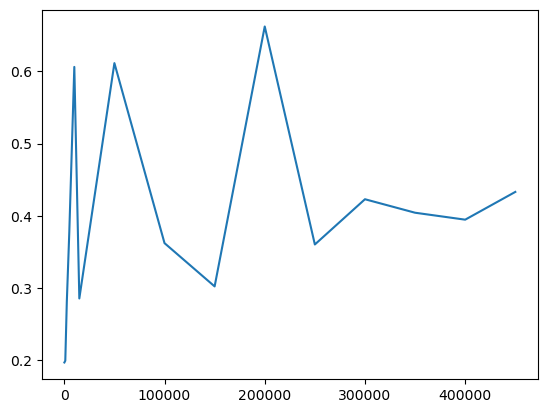

In [31]:
plt.plot(times.keys(), times.values());

From the above plot, no clear time complexity pattern can be identified due to the large time variability between input sizes. Most likely, these fluctuations are of random nature and no conclusions about the complexity of the search function can be made in this way.

Since the scaling test with a maximum of 50.000 words stored in the ternary search tree does not suffice in capturing the scaling behaviour of the search function of the ternary search tree, a larger ternary search tree is sought after. For this purpose, a list of 497.187 words if gathered from www.wordfrequency.info, containing words that appear at least four times in the Corpus of Contemporary American English (COCA). The full list of the words and their associated frequencies can be found at https://raw.githubusercontent.com/nicklink483/wordlist/master/words.txt.

This word list will be used for all of the following scaling tests.

In [28]:
with open('full_word_list.txt') as file:
    words_full = [line.strip() for line in file]

len(words_full)

497187

In [29]:
sizes = [100, 1_000, 2_500, 5_000, 10_000, 15_000, 25_000, 50_000, 100_000, 150_000, 200_000, 250_000, 300_000, 350_000, 400_000, 450_000]


samples_full = [
    random.sample(words_full, k=size) for size in sizes
]

In [33]:
nr_runs = 10_000
times = {}
search_sample = random.sample(words_full, k=20)
for sample in samples_full:
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word, exact='True')
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.20657988,
 1000: 0.18975692,
 2500: 0.22897198,
 5000: 0.23770686,
 10000: 0.29811921,
 15000: 0.32994514,
 25000: 0.28459269,
 50000: 0.38562097,
 100000: 0.4153346,
 150000: 0.360994,
 200000: 0.4315297,
 250000: 0.46156985,
 300000: 0.50700726,
 350000: 0.3695988,
 400000: 0.3904541,
 450000: 0.37650703}

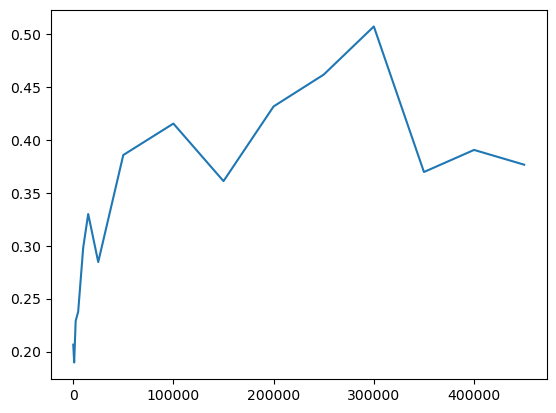

In [34]:
plt.plot(times.keys(), times.values());

From the plot above it is evident that the execution time for searching a word in the ternary tree greatly increases between the tree size of 100 and 100.000 words (0.2 to 0.42). However, from the size of 100.000 words onwards we do not see such an increasing trend anymore, for example, from 100.000 to 200.000 words there is only an increase of 0.02 in execution time. These characteristics concur with the logistic time complexity described above. 

**Search (prefix):**

In [40]:
nr_runs = 10_000
times = {}

search_sample = random.sample(words_full, k=20)
random_sample = [sample_word[:-2] for sample_word in search_sample]

for sample in samples_full:
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in search_sample:
            tst.search(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.15124592,
 1000: 0.1695916,
 2500: 0.18218387,
 5000: 0.19588035,
 10000: 0.23632347,
 15000: 0.25740843,
 25000: 0.25275054,
 50000: 0.27280785,
 100000: 0.35132248,
 150000: 0.2771573,
 200000: 0.31482407,
 250000: 0.31073431,
 300000: 0.29066177,
 350000: 0.36283702,
 400000: 0.42540381,
 450000: 0.29840756}

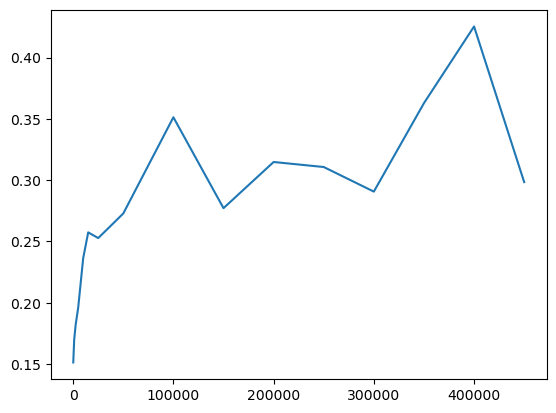

In [41]:
plt.plot(times.keys(), times.values());

Similarly for prefix search, an increase in tree size of 100 to 100.000 words also greatly increases the mean execution time (0.15 to 0.35), while any further increases in tree size do not show this clear increasing relationship. Again, this pattern agrees with the logarithmic time complexity of the prefix search function.

**Insert:**

In [80]:
nr_runs = 10_000
times = {}
insert_sample = random.sample(words_full, k=20)
for sample in samples_full:
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        for word in insert_sample:
            tst.insert(word)
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 0.2816196,
 1000: 0.39974623,
 2500: 0.42646535,
 5000: 0.39203367,
 10000: 0.40757471,
 15000: 0.41100411,
 25000: 0.3781619,
 50000: 0.31115062,
 100000: 0.33292689,
 150000: 0.39531586,
 200000: 0.48163119,
 250000: 0.3805746,
 300000: 0.41025469,
 350000: 0.3811099,
 400000: 0.40646884,
 450000: 0.41799134}

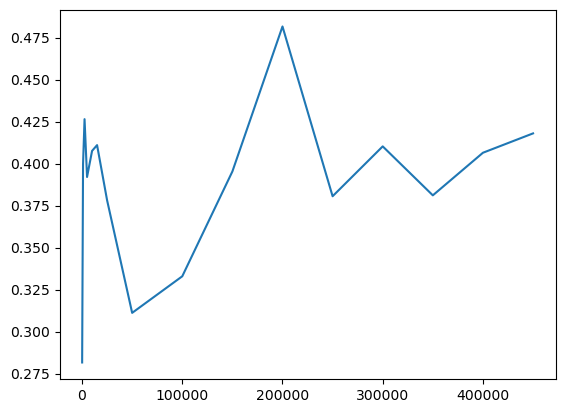

In [81]:
plt.plot(times.keys(), times.values());

The pattern of the scaling behaviour of the insert function is a bit less clear. Although, we are still able to identify a large increase in execution time between a tree size of 100 and 15.000 (0.28 to 0.41), the further function between tree size and mean execution time is difficult to describe. Still, this is far from a linear relationship and is still closer to a logarithmic relationship between execution time and tree size.

**All strings:**

In [99]:
nr_runs = 10
times = {}
# search 20 words in tree structure
insert_sample = random.sample(words_full, k=20)
for sample in samples_full:
    tst = TernarySearchTree()
    for word in sample:
        tst.insert(word)
    times[len(sample)] = 0.0
    for _ in range(nr_runs):
        start_time = time.time_ns()
        tst.all_strings()
        end_time = time.time_ns()
        times[len(sample)] += end_time - start_time
    times[len(sample)] /= nr_runs*1_000_000.0
times

{100: 1.09699,
 5000: 34.80691,
 25000: 169.37687,
 50000: 348.22501,
 100000: 491.88492,
 150000: 596.01681,
 200000: 1042.30048,
 250000: 1139.90535,
 300000: 1135.92705,
 350000: 1200.48981,
 400000: 1252.63925,
 450000: 1506.43641}

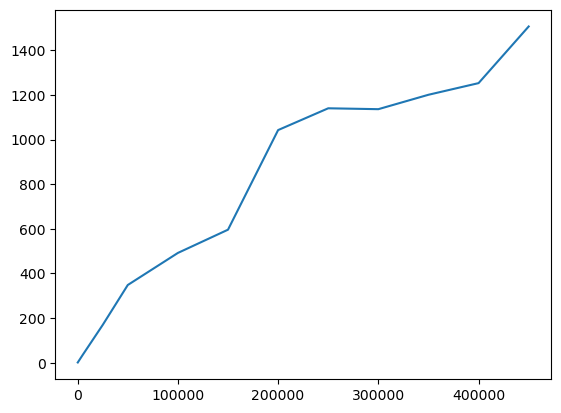

In [100]:
plt.plot(times.keys(), times.values());

From the above plot it is clear that the execution time of the all strings function has a linear relationship with the tree size. This relationship was indeed hypothesized in the time complexity section. With increasing tree size execution time also increases and this effect is not slowing down like seen in the logarithmic relationships.

## Benchmark test

To evaluate the overall performance of the ternary tree functions a benchmark test is performed.

In [7]:
tst = TernarySearchTree()

with open('full_word_list.txt') as file:
    words = [
        line.strip() for line in file
    ]

In [8]:
import pytest

def insert_words(words):
    for word in words:
        tst.insert(word)

@pytest.mark.benchmark
def test_insert(benchmark):
    benchmark(insert_words, words)


@pytest.mark.benchmark
def test_search(benchmark):
    benchmark(tst.search, "proxy")

@pytest.mark.benchmark
def test_all_search(benchmark):
    benchmark(tst.all_strings)

| Name (time in us) | Min             | Max             | Mean            | StdDev         | Median          | IQR            |
|-------------------|-----------------|-----------------|-----------------|----------------|-----------------|----------------|
| test_search       | 31.2880         | 281.6000        | 34.9378         | 7.4970         | 34.1330         | 0.5700         |
| test_all_search   | 1,232,972.5820  | 1,955,066.8670  | 1,488,283.7298  | 290,537.6370   | 1,384,650.9180  | 387,349.0163   |
| test_insert       | 15,079,314.5120 | 18,963,927.3140 | 16,353,968.6836 | 1,544,126.5399 | 15,737,625.5250 | 1,692,361.7257 |

Results of the benchmark test are shown in microseconds. For all functions, the minimum, maximum, mean and median execution time is provided, together with the standard deviation and IQR. It is clear that the search function is the fasted, with a mean execution time of 0.034938 milliseconds (SD = 0.007497 milliseconds). Secondly, the function that returns all strings has a mean execution time of 1.4883 seconds (SD = 0.29 seconds). It makes sense that this function has a larger execution time. Whereas the search function halts execution when an appropriate endpoint is reached, thus only traversing a small portion of the graph, the all strings function is required to have visited all points in the graph. Lastly, the insert function has a mean execution time of 16.353 seconds (SD = 1.544 seconds). Note that this execution time is based on the creation of an entire tree structure, not the insertion of one word. In this case, the benchmarking procedure used the list of 497.187 words to insert in the graph. Benchmark test with different input data sizes would result in different execution time estimations.



This code also has tested with small dataset includes 1000 entries.

In [ ]:
tst_2 = TernarySearchTree()

with open('small_dataset.txt') as file:
    words = [
        line.strip() for line in file
    ]

In [ ]:
import pytest

def insert_words(words):
    for word in words:
        tst.insert(word)

@pytest.mark.benchmark
def test_insert(benchmark):
    benchmark(insert_words, words)


@pytest.mark.benchmark
def test_search(benchmark):
    benchmark(tst.search, "proxy")

@pytest.mark.benchmark
def test_all_search(benchmark):
    benchmark(tst.all_strings)


Name (time in us)                Min                       Max                      Mean                  StdDev                    Median                     IQR                    
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
test_search                  18.5000 (1.0)            134.1000 (1.0)             21.0843 (1.0)            5.8295 (1.0)             18.9000 (1.0)            0.2000 (1.0)             
test_all_search         663,283.0000 (>1000.0)    700,649.9000 (>1000.0)    672,816.3600 (>1000.0)   15,829.3590 (>1000.0)    666,162.8000 (>1000.0)   14,601.5500 (>1000.0)             
test_insert           6,855,520.1000 (>1000.0)  7,344,132.3000 (>1000.0)  7,006,138.9400 (>1000.0)  202,033.0030 (>1000.0)  6,935,841.8000 (>1000.0)  250,087.0750 (>1000.0)             
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This code also have tested with small dataset.the results are shown in microseconds.Function test search has a mean execution time 0.021 milliseconds.it appears that "test_search" has the lowest execution times on average, with a relatively small standard deviation(0.000005829 seconds) and IQR, indicating consistent performance.Function test_all_search which return all strings,in average has a 0.67281636 seconds execution time.Test_insert in average has a mean execution time 7.00613894 seconds,which this results show this function  has significantly higher execution times, a larger standard deviation(0.202033003seconds), and a wider IQR, suggesting more variability in the results.


Overall, these execution times provide arguments for an efficient implementation of the ternary tree structure and its associated functions.